In [73]:
#Import necessary algorithms

from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
import numpy as np
import matplotlib.pylab as plt
from time import time

In [82]:
# Importing the image

lena = rgb2gray(imread(r'C:\Users\jahma\Documents\Image processing\dictionary learning\image-tst2.jpg'))

# Assuming lena is already loaded and converted to grayscale
height, width = lena.shape  # Get the dimensions of the image
print('Distorting the lower half of the image...')
distorted = lena.copy()

# Create noise for the lower half of the image
noise = 0.085 * np.random.randn(height - (height // 2), width)

# Add noise to the lower half of the distorted image
distorted[height // 2:, :] += noise


Distorting the lower half of the image...


In [84]:
# creating a reference patch
print('Extracting reference patches...')
patch_size = (7, 7)
data = extract_patches_2d(distorted[height // 2:, :], patch_size)
data = data.reshape(data.shape[0], -1)
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)

Extracting reference patches...


In [85]:
print('Learning the dictionary...')
dico = MiniBatchDictionaryLearning(n_components=256, alpha=1, n_iter=600)
V = dico.fit(data).components

Learning the dictionary...


MemoryError: Unable to allocate 8.88 GiB for an array with shape (4481268, 266) and data type float64

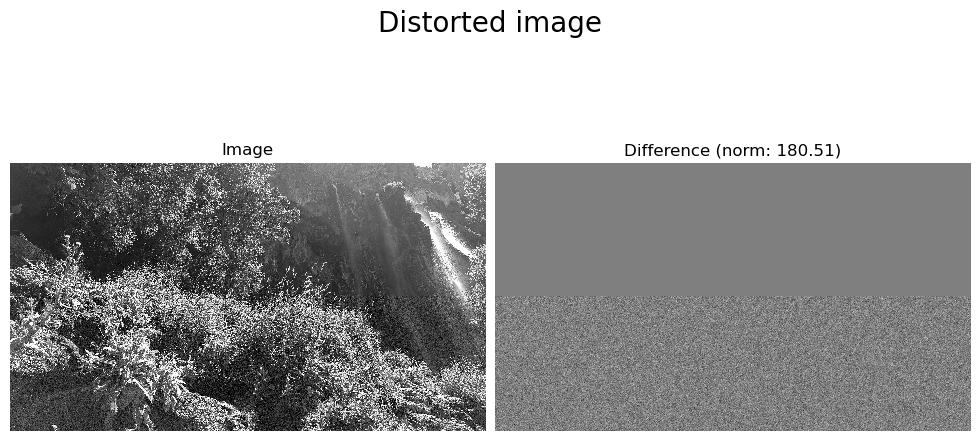

In [86]:
def show_with_diff(image, reference, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.title('Image')
    plt.imshow(image, vmin=0, vmax=1, cmap=plt.cm.gray, interpolation='nearest'), plt.axis('off')
    plt.subplot(122)
    difference = image - reference
    plt.title('Difference (norm: %.2f)' % np.sqrt(np.sum(difference ** 2)))
    plt.imshow(difference, vmin=-0.5, vmax=0.5, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off'), plt.suptitle(title, size=20)
    plt.subplots_adjust(0.02, 0.02, 0.98, 0.79, 0.02, 0.2)
    plt.show()
    
    
show_with_diff(distorted, lena, 'Distorted image')

In [87]:
print('Extracting noisy patches... ')
data = extract_patches_2d(distorted[height // 2:, :], patch_size)
data = data.reshape(data.shape[0], -1)
intercept = np.mean(data, axis=0)
data -= intercept

Extracting noisy patches... 


In [78]:
print('Orthogonal Matching Pursuit\n2 atoms' + '...')
kwargs = {'transform_n_nonzero_coefs': 2}
reconstruction = lena.copy()
dico.set_params(transform_algorithm='omp', **kwargs)
code = dico.transform(data)
patches = np.dot(code, V)
patches += intercept
patches = patches.reshape(len(data), *patch_size)
reconstruction[height // 2:, :] = reconstruct_from_patches_2d(patches, (height // 2, width))

show_with_diff(reconstruction, lena, 'Orthogonal Matching Pursuit 2 atoms')

Orthogonal Matching Pursuit
2 atoms...


AttributeError: 'MiniBatchDictionaryLearning' object has no attribute 'components_'

In [79]:
print('Orthogonal Matching Pursuit\n2 atoms...')

# Set parameters for OMP
kwargs = {'transform_n_nonzero_coefs': 2}
reconstruction = lena.copy()

# Configure the dictionary for OMP
dico.set_params(transform_algorithm='omp', **kwargs)

# Transform the data using the dictionary
code = dico.transform(data)

# Reconstruct patches
patches = np.dot(code, V) + intercept  # Combine code and dictionary, then add intercept
patches = patches.reshape(len(data), *patch_size)  # Reshape patches for reconstruction

# Place reconstructed patches into the lower half of the reconstruction
reconstruction[height // 2:, :] = reconstruct_from_patches_2d(patches, (height // 2, width))

# Display the reconstruction alongside the original image
show_with_diff(reconstruction, lena, 'Orthogonal Matching Pursuit 2 atoms')


Orthogonal Matching Pursuit
2 atoms...


AttributeError: 'MiniBatchDictionaryLearning' object has no attribute 'components_'